# EDA on Judicial Data

In [1]:
import pandas as pd

In [2]:
# reading the chunked csv as dataframe
df=pd.read_csv(r"chunk0.csv")
df

,ddl_case_id,year,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list
0,01-01-01-200308002162010,2010,1,1,1,MHNB030013812010,chief judicial magistrate,0 male,1 female,0,-9998,790,5228.0,42,2010-12-13,2011-06-19,2011-06-08,2011-06-20,2011-06-24
1,01-01-01-200707000172010,2010,1,1,1,MHNB030004552010,chief judicial magistrate,-9998 unclear,1 female,-9999,0,2587,3627.0,42,2010-02-25,2010-11-21,2010-08-06,2010-08-06,2010-11-30
2,01-01-01-200707000182010,2010,1,1,1,MHNB030004562010,chief judicial magistrate,-9998 unclear,-9998 unclear,-9999,0,2587,3627.0,42,2010-02-25,2010-11-21,2010-08-06,2010-08-06,2010-11-30
3,01-01-01-200707000192010,2010,1,1,1,MHNB030004582010,chief judicial magistrate,-9998 unclear,1 female,-9999,0,2587,3627.0,42,2010-02-25,2010-11-21,2010-08-06,2010-08-06,2010-11-30
4,01-01-01-200707000202010,2010,1,1,1,MHNB030004592010,chief judicial magistrate,-9998 unclear,-9998 unclear,-9999,0,2587,3627.0,42,2010-02-25,2010-11-21,2010-08-06,2010-08-06,2010-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,01-04-02-203003001192010,2010,1,4,2,MHBU030010912010,chief judicial magistrate,0 male,-9998 unclear,-9999,-9998,4018,1963.0,30,2010-06-15,2011-01-19,2010-06-15,2011-01-18,2011-01-19
49996,01-04-02-203003001202010,2010,1,4,2,MHBU030011022010,chief judicial magistrate,0 male,-9998 unclear,-9999,-9998,4018,509.0,30,2010-06-17,2011-08-06,2010-06-17,2011-07-13,2011-08-06
49997,01-04-02-203003001212010,2010,1,4,2,MHBU030011032010,chief judicial magistrate,0 male,-9998 unclear,-9999,-9998,4018,3280.0,30,2010-06-17,2013-12-03,2010-06-17,2013-12-02,2013-12-03
49998,01-04-02-203003001222010,2010,1,4,2,MHBU030011252010,chief judicial magistrate,0 male,-9998 unclear,-9999,-9998,4018,1963.0,30,2010-06-18,2012-01-18,2010-06-18,2012-01-11,2012-01-18


 Right off the bat, the most interesting thing about this dataset is the gender data about the petitioners and defendants.
 We shall try to visualise that.

<AxesSubplot:xlabel='female_adv_pet'>

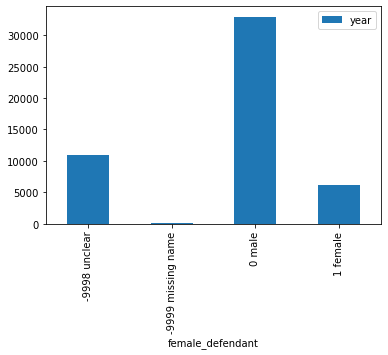

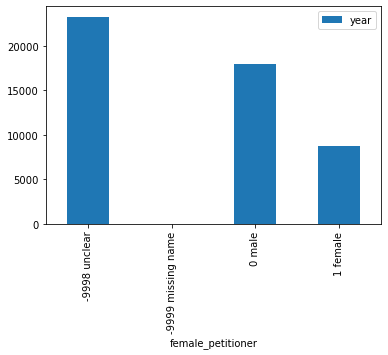

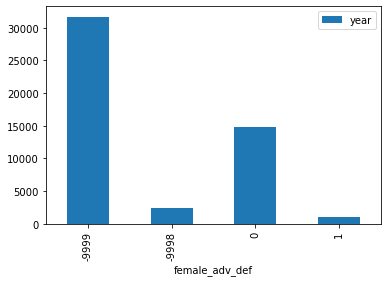

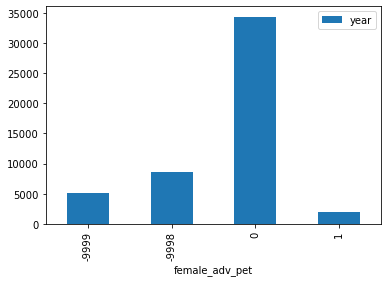

In [3]:
#visualising gender data
fem_def=df.groupby('female_defendant').count()
fem_pet=df.groupby('female_petitioner').count()
fem_adv_def=df.groupby('female_adv_def').count()
fem_adv_pet=df.groupby('female_adv_pet').count()



fem_def.plot(kind='bar',y='year')
fem_pet.plot(kind='bar',y='year')
fem_adv_def.plot(kind='bar',y='year')
fem_adv_pet.plot(kind='bar',y='year')

We see that it is a male dominated profession. We see a slight increase of female participation here in the petitioner diagram.

Other than that, there is a large portion of data which is either unclear or missing a name.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ddl_case_id        50000 non-null  object 
 1   year               50000 non-null  int64  
 2   state_code         50000 non-null  int64  
 3   dist_code          50000 non-null  int64  
 4   court_no           50000 non-null  int64  
 5   cino               50000 non-null  object 
 6   judge_position     50000 non-null  object 
 7   female_defendant   50000 non-null  object 
 8   female_petitioner  50000 non-null  object 
 9   female_adv_def     50000 non-null  int64  
 10  female_adv_pet     50000 non-null  int64  
 11  type_name          50000 non-null  int64  
 12  purpose_name       48398 non-null  float64
 13  disp_name          50000 non-null  int64  
 14  date_of_filing     50000 non-null  object 
 15  date_of_decision   48633 non-null  object 
 16  date_first_list    499

In [5]:
# we need to convert the columns containing dates to datetime format to perform analysis on them.
df['date_of_filing']=pd.to_datetime(df['date_of_filing'])
df['date_first_list']=pd.to_datetime(df['date_first_list'])
df['date_next_list']=pd.to_datetime(df['date_next_list'])
df['date_of_decision']=pd.to_datetime(df['date_of_decision'])
df['date_last_list']=pd.to_datetime(df['date_last_list'],errors='coerce')

We can try to do analysis between the date of filing and the date of decision, ie. the day the case was filed and and the date when a decision was reached on it.

In [7]:
day=[]
for i in range(len(df)):
    duration=df['date_of_decision'][i]-df['date_of_filing'][i]
    day.append(duration.days)
df['decision_duration']=day

In [9]:
df['decision_duration']

0         188.0
1         269.0
2         269.0
3         269.0
4         269.0
          ...  
49995     218.0
49996     415.0
49997    1265.0
49998     579.0
49999     565.0
Name: decision_duration, Length: 50000, dtype: float64

In [16]:
print('The case which took the longest time to reach a decision took {} days.'.format(df['decision_duration'].max()))
print('The case which took the least time to reach a decision took {} day(s).'.format(df['decision_duration'].min()))
print('On average, a case takes {} years to reach a decision.'.format(df['decision_duration'].mean()/365))

The case which took the longest time to reach a decision took 3811.0 days.
The case which took the least time to reach a decision took -251.0 day(s).
On average, a case takes 2.3796333117289716 years to reach a decision.


Here we, see something strange. In some cases, the date of decision is earlier than the date of filing. We see, there are 71 such instances.

In [18]:
df.loc[df['decision_duration']<0]

,ddl_case_id,year,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list,decision_duration
3166,01-01-05-203011000052010,2010,1,1,5,MHNB060000512010,civil judge junior division,0 male,-9998 unclear,-9998,-9998,4018,328.0,25,2010-01-07,2010-01-04,2010-01-20,2010-01-04,2010-01-04,-3.0
4487,01-01-05-203411011892010,2010,1,1,5,MHNB060014222010,civil judge junior division,0 male,-9998 unclear,-9999,-9998,4400,3897.0,25,2010-12-22,2010-12-02,2010-12-22,2011-02-28,2011-03-28,-20.0
5453,01-01-07-201809000082010,2010,1,1,7,MHNB040003642010,additional district and sessions court,-9998 unclear,-9998 unclear,0,0,1441,509.0,25,2010-10-30,2010-03-06,2010-02-22,2010-03-02,2010-03-06,-238.0
10353,01-02-02-201903005462010,2010,1,2,2,MHDH030038812010,chief judicial magistrate,0 male,-9998 unclear,-9999,-9998,1429,3627.0,25,2010-11-08,2010-11-01,2010-11-01,2010-11-01,2010-11-01,-7.0
12115,01-02-02-203403006732010,2010,1,2,2,MHDH030011412010,chief judicial magistrate,1 female,-9998 unclear,-9999,-9998,4400,4946.0,25,2010-03-30,2010-03-29,2010-03-29,2010-03-29,2010-03-29,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45068,01-03-17-203409002362010,2010,1,3,17,MHJG190003882010,criminal cases,0 male,-9998 unclear,-9999,-9999,4400,NaN,26,2010-04-08,2010-03-08,2010-03-08,NaT,NaT,-31.0
45069,01-03-17-203409002372010,2010,1,3,17,MHJG190003892010,criminal cases,0 male,-9998 unclear,-9999,-9999,4400,NaN,26,2010-04-08,2010-03-08,2010-03-08,NaT,NaT,-31.0
45070,01-03-17-203409002382010,2010,1,3,17,MHJG190003902010,criminal cases,0 male,-9998 unclear,-9999,-9999,4400,NaN,26,2010-04-08,2010-03-08,2010-03-08,NaT,NaT,-31.0
46200,01-03-19-200315000202010,2010,1,3,19,MHJG200006362010,criminal cases,-9998 unclear,1 female,-9999,0,790,3627.0,22,2010-10-27,2010-02-18,2010-12-13,2011-06-08,2011-07-13,-251.0


In [19]:
df.loc[df['decision_duration']==0]

,ddl_case_id,year,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list,decision_duration
482,01-01-01-203008001732010,2010,1,1,1,MHNB030005592010,chief judicial magistrate,0 male,1 female,-9999,0,4018,3734.0,25,2010-06-16,2010-06-16,2010-06-16,2010-06-16,2010-06-16,0.0
491,01-01-01-203008001822010,2010,1,1,1,MHNB030005892010,chief judicial magistrate,0 male,1 female,-9999,0,4018,3734.0,25,2010-06-22,2010-06-22,2010-06-22,2010-06-22,2010-06-22,0.0
522,01-01-01-203008002142010,2010,1,1,1,MHNB030007722010,chief judicial magistrate,-9998 unclear,1 female,-9999,0,4018,3734.0,25,2010-07-26,2010-07-26,2010-07-26,2010-07-26,2010-07-26,0.0
525,01-01-01-203008002172010,2010,1,1,1,MHNB030007762010,chief judicial magistrate,-9998 unclear,0 male,-9999,0,4018,3734.0,25,2010-07-27,2010-07-27,2010-07-27,2010-07-27,2010-07-27,0.0
530,01-01-01-203008002222010,2010,1,1,1,MHNB030008072010,chief judicial magistrate,0 male,-9998 unclear,1,0,4018,3734.0,25,2010-08-03,2010-08-03,2010-08-03,2010-08-03,2010-08-03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49688,01-04-02-201903002932010,2010,1,4,2,MHBU030014932010,chief judicial magistrate,-9998 unclear,0 male,-9999,-9999,1429,328.0,25,2010-08-09,2010-08-09,2010-08-09,2010-08-09,2010-08-09,0.0
49761,01-04-02-201903003662010,2010,1,4,2,MHBU030017312010,chief judicial magistrate,0 male,-9998 unclear,-9999,-9998,1429,328.0,25,2010-09-27,2010-09-27,2010-09-27,2010-09-27,2010-09-27,0.0
49763,01-04-02-201903003682010,2010,1,4,2,MHBU030017422010,chief judicial magistrate,1 female,0 male,-9999,-9999,1429,328.0,25,2010-09-27,2010-09-27,2010-09-27,2010-09-27,2010-09-27,0.0
49878,01-04-02-203003000022010,2010,1,4,2,MHBU030000072010,chief judicial magistrate,1 female,-9998 unclear,-9999,-9998,4018,328.0,25,2010-01-01,2010-01-01,2010-01-01,2010-01-01,2010-01-01,0.0


There are 2474 cases which came to a decision on the day when it was filed. On closer look, a majority of these cases are either "Regular Criminal Case" or an "Condonation of delay of appearance". All these cases are disposed.

Next, we take a look at he judges data

In [20]:
judges=pd.read_csv(r"C:\Users\Vijay\Downloads\Precog task\csv\judges_clean\judges_clean.csv")
judges

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018
...,...,...,...,...,...,...,...,...
98473,98474,30,2,9,criminal cases,1 female,21-04-2004,14-11-2013
98474,98475,30,2,9,criminal cases,1 female,16-01-2015,16-01-2016
98475,98476,30,2,9,criminal cases,1 female,09-12-2016,31-07-2017
98476,98477,30,2,10,criminal cases,1 female,15-05-2017,28-01-2019


<AxesSubplot:ylabel='state_code'>

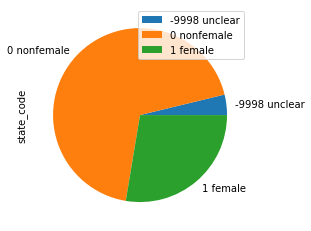

In [21]:
# Again, we start off with plotting the gender ratio of the officials.
fem_judge=judges.groupby('female_judge').count()
fem_judge.plot(kind='pie',y='state_code')

We see that around 28% of judges are female while the majority are male and a few unclear.